In [411]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import h5py
%matplotlib inline

In [422]:
f = h5py.File("logging/logs4.txt", 'r', libver='latest', swmr=True)
#f = h5py.File("/Users/anshulramachandran/Documents/Research/yisong/logging/logs2.txt", 'r', libver='latest', swmr=True)
move_q =  f['statistics']["ep_move_q"][:]
kick_q =  f['statistics']["ep_kick_q"][:]
turn_q = f['statistics']["ep_turn_q"][:]
tackle_q = f['statistics']["ep_tackle_q"][:]
good_q = f['statistics']["ep_good_q"][:]
bad_q = f['statistics']["ep_bad_q"][:]

r=  f['statistics']["ep_reward"][:]
closs = f['statistics']["ep_closs"][:]
aloss= f['statistics']["ep_aloss"][:]
numdone = f['statistics']["ep_numdone"][0]

In [423]:
numdone

2972

In [424]:
def plot_dual(data, num, ylab, title):
    data = data[:, :num]

    d1 = data[0]
    d2 = data[1]
    
    d1m = []
    d2m = []
    xs = []
    sz = 50
    for i in range(1+(len(d1) / sz)):
        d1m.append(np.nanmean(d1[sz*i:sz+sz*i]))
        d2m.append(np.nanmean(d2[sz*i:sz+sz*i]))
        xs.append(sz*i)

    plt.plot(d1, linestyle="", marker=".")
    plt.plot(d2, linestyle="", marker=".")
    plt.plot(xs, d1m,linewidth=2, color="black")
    plt.plot(xs, d2m,linewidth=2, color="blue")
    plt.plot([0]*len(d2), linestyle=":", color="black")

    plt.title(title)
    plt.xlabel("Episode")
    plt.ylabel(ylab)
    plt.show()

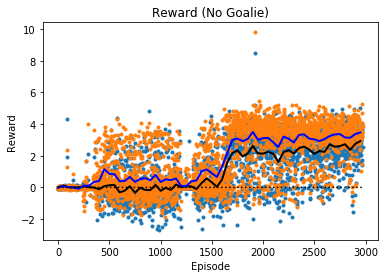

In [425]:
plot_dual(r, numdone, "Reward", "Reward (No Goalie)")

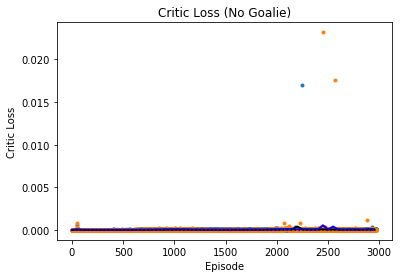

In [426]:
plot_dual(closs, numdone, "Critic Loss", "Critic Loss (No Goalie)")

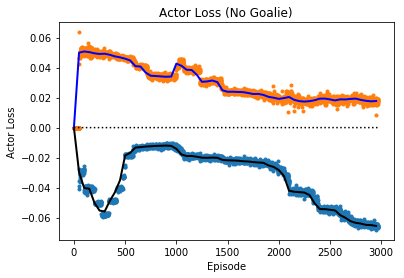

In [427]:
plot_dual(aloss, numdone, "Actor Loss", "Actor Loss (No Goalie)")

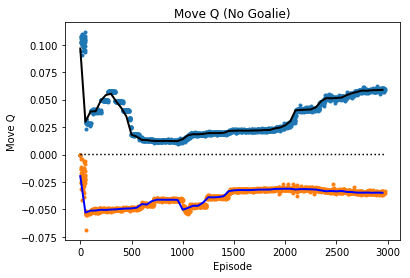

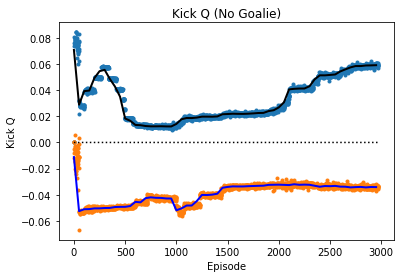

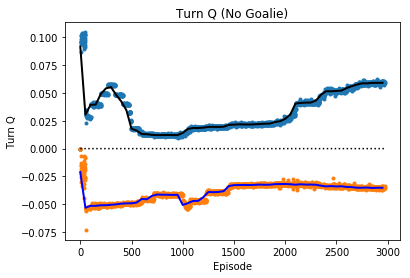

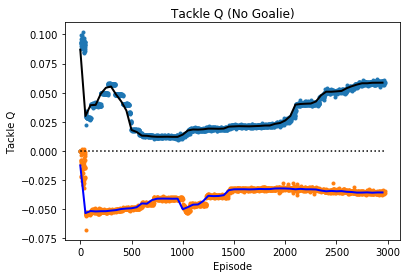

In [428]:
plot_dual(move_q, numdone, "Move Q", "Move Q (No Goalie)")
plot_dual(kick_q, numdone, "Kick Q", "Kick Q (No Goalie)")
plot_dual(turn_q, numdone, "Turn Q", "Turn Q (No Goalie)")
plot_dual(tackle_q, numdone, "Tackle Q", "Tackle Q (No Goalie)")

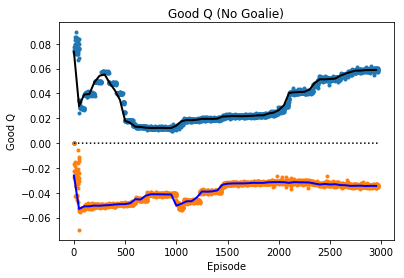

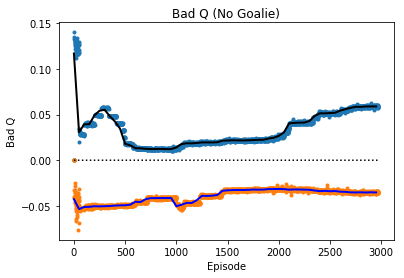

In [429]:
plot_dual(good_q, numdone, "Good Q", "Good Q (No Goalie)")
plot_dual(bad_q, numdone, "Bad Q", "Bad Q (No Goalie)")

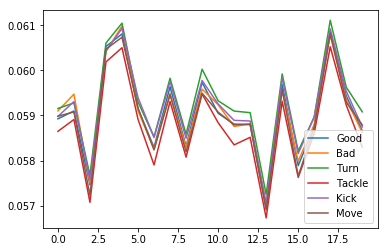

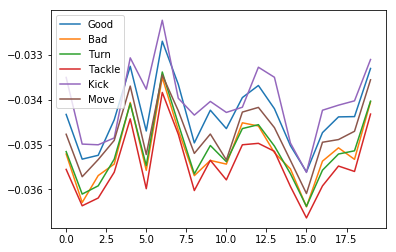

In [430]:
skip = numdone - 20
for p in [0,1]:
    plt.plot(good_q[p, skip: numdone], linestyle="-", marker="", label = "Good")
    plt.plot(bad_q[p, skip: numdone], linestyle="-", marker="", label = "Bad")
    plt.plot(turn_q[p, skip: numdone], linestyle="-", marker="", label = "Turn")
    plt.plot(tackle_q[p, skip: numdone], linestyle="-", marker="", label = "Tackle")
    plt.plot(kick_q[p, skip: numdone], linestyle="-", marker="", label = "Kick")
    plt.plot(move_q[p, skip:numdone], linestyle="-", marker="", label = "Move")
#     plt.plot([0]*numdone, linestyle=":")

    plt.legend()
    plt.plot()
    plt.show()